<h1>Metodo de Maxima Verossimilhança usando Espectro de Potência</h1>
<h3>Aluno:Matheus Vitor, Astroinformática 2021<h3>

In [1]:
# importando o modulo classy 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from classy import Class 
from math import pi
from nbodykit.lab import *
from nbodykit import style, setup_logging
from nbodykit.lab import cosmology

Conforme definido o parametro $\sigma_8$, 
$$
\sigma_{8}^{2} = \dfrac{1}{2\pi^{2}}\int W_{s}^{2}k^{2}P(k)dk
$$
onde $W_{s}$ é um filtro tophat de raio $8h^{-1}Mpc$ no espaço de Fourier 
$$
W_{s} = \dfrac{3j_{1}(kR_{8})}{kR_{8}}
$$
onde $j_{1}$ são funções de Bessel esférica de primeira ordem. 

Buscaremos utilizar esse parametro para ser o parametro de nossa Likelihood a ser otimizado e assim determinar os parâmetros $\Omega_{B}$ e $h$ que melhor descrevem o valor de $\sigma_{8}$ simulado, no qual representa uma medida. 

In [2]:
######## Definindo de forma geral no trabalho o redshift e valor de divisões
redshift = 0.001
Nbins = 30

In [3]:
#Definindo um modelo fiducial 
#parametros de https://arxiv.org/abs/1807.06209 Planck Results 2018
CosmoFiducial = cosmology.Cosmology(h=0.67556, T0_cmb=2.7255, Omega0_b = 0.0483,Omega0_cdm = 0.2638,n_s = 0.9619)
Plin = cosmology.LinearPower(CosmoFiducial, redshift, transfer='EisensteinHu')
SigmaFiducial = Plin.sigma_r(r=8)
print(SigmaFiducial)

#Sorteando um valor de Sigma8 através de uma Gaussiana de desvio padrão 0.03
#Assim simulamos uma medida de Sigma8 com um determinada incerteza
SigmaFiducial = np.random.normal(SigmaFiducial, 0.03)
print(SigmaFiducial)

0.836013541183237
0.861011657702


In [4]:
#Explorando a densidade crítica de barions 
OmegaB = np.linspace(0.02, 0.06, Nbins)
logL = np.empty(Nbins)
SigmaSample = np.empty(Nbins)
for m in range(Nbins):
    cosmo = cosmology.Cosmology(h=0.67556, T0_cmb=2.7255, Omega0_b = OmegaB[m],Omega0_cdm = 0.2638,n_s = 0.9619)
    Plin = cosmology.LinearPower(cosmo, redshift, transfer='CLASS')
    SigmaSample[m] = Plin.sigma_r(r=8)
    #Definindo o erro de sigma8 como sendo de 10% de seu valor 
    ErroSigma = Plin.sigma_r(r=8)/10
    #Determinando o log da Likelihood 
    logL[m] =  -np.sum((0.5 * ((SigmaSample[m] - SigmaFiducial ) / ErroSigma) ** 2))    
    

O valor de Omega Barions que melhor ajusta os dados é [0.04068966]
E o besfit de sigma8 é [0.86009886]


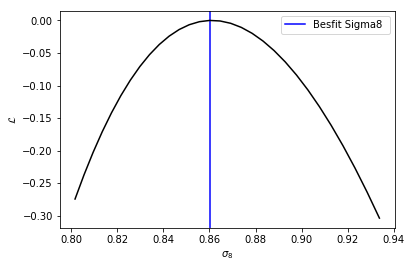

In [5]:
#Buscando qual foi o valor de OmegaB que determinou o máximo da Likelihood 
loc = np.where(logL == np.max(logL))
#print(loc)
#print(sigmaSimulados[loc])
print("O valor de Omega Barions que melhor ajusta os dados é {}".format(OmegaB[loc]))
print("E o besfit de sigma8 é {}".format(SigmaSample[loc]))
plt.axvline(x = SigmaSample[loc], color = 'b', label = 'Besfit Sigma8 ')
plt.plot(SigmaSample, logL, c='k')
plt.xlabel(r'$\sigma_{8}$')
plt.ylabel(r'$\mathcal{L}$')
plt.legend()

In [6]:
#Usando a mesma ídeia para restringir H0
hSample = np.linspace(0.57810, 0.77810, Nbins)
logL = np.empty(Nbins)
SigmaSample = np.empty(Nbins)
for m in range(Nbins):
    cosmo = cosmology.Cosmology(h=hSample[m], T0_cmb=2.7255, Omega0_b = 0.0483,Omega0_cdm = 0.2638,n_s = 0.9619)
    Plin = cosmology.LinearPower(cosmo, redshift, transfer='CLASS')
    SigmaSample[m] = Plin.sigma_r(r=8)
    ErroSigma = Plin.sigma_r(r=8)/10
    logL[m] = - np.sum(0.5 * ((SigmaSample[m] - SigmaFiducial ) / ErroSigma) ** 2)    
    

O valor de h que melhor ajusta os dados é [0.69534138]
E o besfit de sigma8 é [0.86400957]


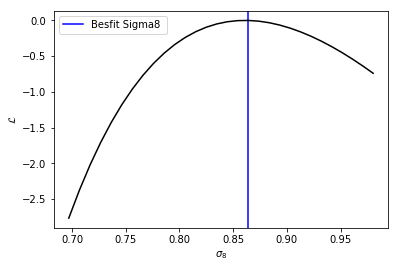

In [7]:
#Buscando qual foi o valor de h que determinou o máximo da Likelihood 
loc = np.where(logL == np.max(logL))
#print(loc)
#print(sigmaSimulados[loc])
print("O valor de h que melhor ajusta os dados é {}".format(hSample[loc]))
print("E o besfit de sigma8 é {}".format(SigmaSample[loc]))
plt.axvline(x = SigmaSample[loc], color = 'b', label = 'Besfit Sigma8 ')
plt.plot(SigmaSample, logL, c='k')
plt.xlabel(r'$\sigma_{8}$')
plt.ylabel(r'$\mathcal{L}$')
plt.legend()

Testando uma segunda cosmologia com $H_{0}$ = 73

In [8]:
OmegaB = np.linspace(0.02, 0.07, Nbins)
logL = np.empty(Nbins)
SigmaSample = np.empty(Nbins)
for m in range(Nbins):
    cosmo = cosmology.Cosmology(h=0.73, T0_cmb=2.7255, Omega0_b = OmegaB[m],Omega0_cdm = 0.2638,n_s = 0.9619)
    Plin = cosmology.LinearPower(cosmo, redshift, transfer='CLASS')
    SigmaSample[m] = Plin.sigma_r(r=8)
    ErroSigma = Plin.sigma_r(r=8)/10
    logL[m] = - np.sum(0.5 * ((SigmaSample[m] - SigmaFiducial ) / ErroSigma) ** 2)    

O valor de Omega Barions que melhor ajusta os dados é [0.06310345]
E o besfit de sigma8 é [0.86349367]


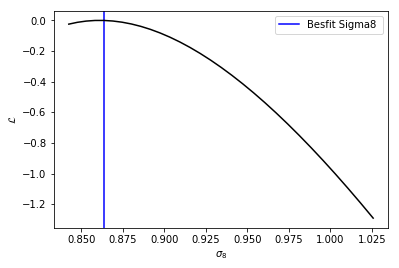

In [9]:
#Buscando qual foi o valor de OmegaB que determinou o máximo da Likelihood 
loc = np.where(logL == np.max(logL))
print("O valor de Omega Barions que melhor ajusta os dados é {}".format(OmegaB[loc]))
print("E o besfit de sigma8 é {}".format(SigmaSample[loc]))
plt.axvline(x = SigmaSample[loc], color = 'b', label = 'Besfit Sigma8 ')
plt.plot(SigmaSample, logL, c='k')
plt.xlabel(r'$\sigma_{8}$')
plt.ylabel(r'$\mathcal{L}$')
plt.legend()

In [10]:
#Usando a mesma ídeia para restringir H0 utilizando um Omega0_b maior (0.06)
hSample = np.linspace(0.57, 0.78, Nbins)
logL = np.empty(Nbins)
SigmaSample = np.empty(Nbins)
for m in range(Nbins):
    cosmo = cosmology.Cosmology(h=hSample[m], T0_cmb=2.7255, Omega0_b = 0.06,Omega0_cdm = 0.2638,n_s = 0.9619)
    Plin = cosmology.LinearPower(cosmo, redshift, transfer='CLASS')
    SigmaSample[m] = Plin.sigma_r(r=8)
    ErroSigma = Plin.sigma_r(r=8)/10
    logL[m] = - np.sum(0.5 * ((SigmaSample[m] - SigmaFiducial ) / ErroSigma) ** 2)    
    

O valor de h que melhor ajusta os dados é [0.72206897]
E o besfit de sigma8 é [0.86297406]


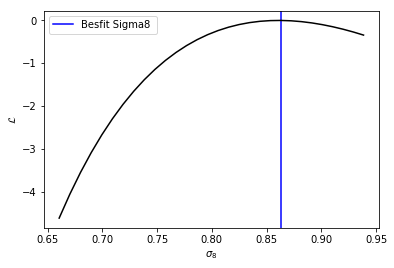

In [11]:
#Buscando qual foi o valor de h que determinou o máximo da Likelihood 
loc = np.where(logL == np.max(logL))
print("O valor de h que melhor ajusta os dados é {}".format(hSample[loc]))
print("E o besfit de sigma8 é {}".format(SigmaSample[loc]))
plt.axvline(x = SigmaSample[loc], color = 'b', label = 'Besfit Sigma8 ')
plt.plot(SigmaSample, logL, c='k')
plt.xlabel(r'$\sigma_{8}$')
plt.ylabel(r'$\mathcal{L}$')
plt.legend()